In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import statistics
import time

from cart import *

from cart import binpi_imputation

from cart import adaboost




In [2]:
#importing carseat dataset, have split 280 / 120

train = pd.read_csv("Carseats_train.csv")
test = pd.read_csv("Carseats_test.csv")

print(train.shape)

high_train = []

for i in range(train.shape[0]):
    if train["Sales"][i] > 8:
        high_train.append("Yes")
    else:
        high_train.append("No")

train["High"] = high_train
del train["Sales"]
del train["Unnamed: 0"]

high_test = []

for i in range(test.shape[0]):
    if test["Sales"][i] > 8:
        high_test.append("Yes")
    else:
        high_test.append("No")

test["High"] = high_test
del test["Sales"]
del test["Unnamed: 0"]

feature_var = "High"
num_var = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education"]
cat_var = ["ShelveLoc", "Urban", "US", "High"]

train.head()

(280, 12)


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


In [3]:
train["High"]

print(Counter(train["High"]))
Counter(train["High"]).most_common(1)[0][1]

Counter({'No': 169, 'Yes': 111})


169

In [4]:
train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


In [5]:
y = train["High"]
print(len(y))
#train.drop(labels = "High", axis = 1, inplace = True)
cat_var = ["ShelveLoc", "Urban", "US"]

280


In [6]:
'''
indici = np.arange(0, len(y))

my_tree = MyNodeClass('n1', indici) 


cart = CART(y,train[num_var],num_var,train[cat_var],cat_var,impurity_fn = "gini",problem="classifier",method = "CART",min_cases_parent= 250,min_cases_child= 5) 

cart.growing_tree(my_tree)
'''


'\nindici = np.arange(0, len(y))\n\nmy_tree = MyNodeClass(\'n1\', indici) \n\n\ncart = CART(y,train[num_var],num_var,train[cat_var],cat_var,impurity_fn = "gini",problem="classifier",method = "CART",min_cases_parent= 250,min_cases_child= 5) \n\ncart.growing_tree(my_tree)\n'

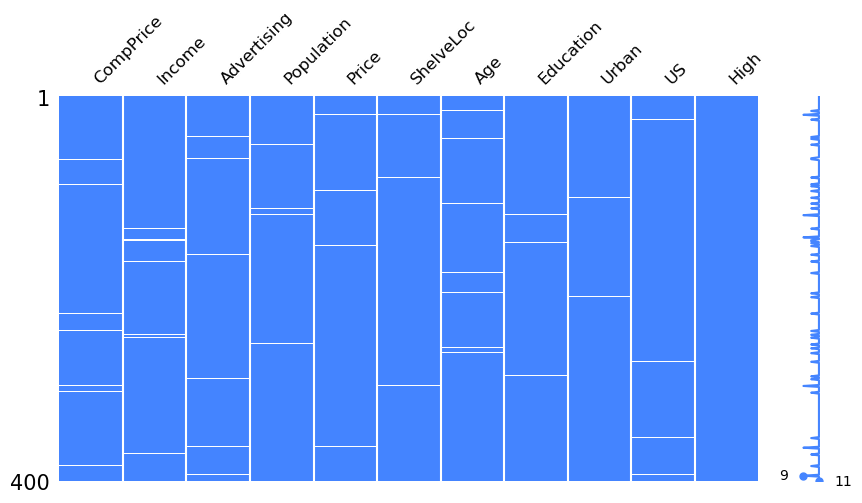

In [7]:
df = pd.concat([train, test], axis = 0)
df.reset_index(drop = True, inplace = True)

df_complete = df.copy()

import random
random.seed(142)
missing_values = 50
#10 columns, not the feature variable 
vars = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education", "ShelveLoc", "Urban", "US"]

#vars = ["CompPrice", "Income", "ShelveLoc", "Urban"]

var_list = []
row_list = []
for i in range(missing_values):
    var_list.append( random.choice(vars)  )
    row_list.append( random.choice(range(0,400))  )


#impute missing values
for i in range(missing_values):
    df.loc[row_list[i], var_list[i]] = np.nan

import missingno
missingno.matrix(df, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


(400, 11)


,High,Urban,Education,Population,Price,ShelveLoc,US,Advertising,Age,CompPrice,Income
0,Yes,Yes,17.0,276.0,120.0,Bad,Yes,11.0,42.0,138.0,73.0
1,Yes,Yes,10.0,260.0,83.0,Good,Yes,16.0,65.0,111.0,48.0
2,Yes,Yes,12.0,269.0,80.0,Medium,Yes,10.0,59.0,113.0,35.0
3,No,Yes,14.0,466.0,97.0,Medium,Yes,4.0,55.0,117.0,100.0
4,No,Yes,13.0,340.0,128.0,Bad,No,3.0,38.0,141.0,64.0


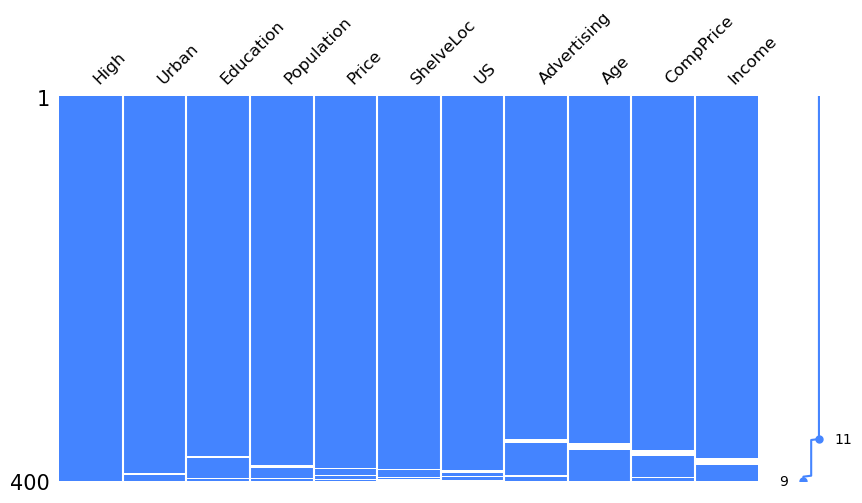

In [8]:
pd.options.mode.chained_assignment = None

id_matrix = id_matrix_creator(df)

df2, column_vect = lexographical_matrix(df, id_matrix)

#dict_match = matches_dict(column_vect)

missingno.matrix(df2, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


bin_var = ["Urban", "US", "High"]
class_var = ["ShelveLoc"]

print(df2.shape)
df2.head() 



In [9]:

'''
dict_match = matches_dict(column_vect)
print(" ".join(column_vect[390][2]))
print(dict_match)
dict_match[" ".join(column_vect[390][2])]
dict_match["US High"]
'''

'\ndict_match = matches_dict(column_vect)\nprint(" ".join(column_vect[390][2]))\nprint(dict_match)\ndict_match[" ".join(column_vect[390][2])]\ndict_match["US High"]\n'

In [10]:
df_binpi = binpi_imputation(df2,column_vect, num_var, bin_var, class_var, weak_learners = 7)

#issue for feature_var as categorical giving multiple splits - not a problem, for greater splits 


Feature Variable:  Advertising 
Missing Values:  50

Iteration 1
Split Found:  n1 [['US', 'Yes', 0.4588800450037943, 0]] start
node_proportion_total  0.4575910561133331
training mse 23.82

Iteration 2
Split Found:  n1 [['US', 'Yes', 0.5427485974553392, 0]] start
node_proportion_total  0.5412240227433872
training mse 19.04

Iteration 3
Split Found:  n1 [['US', 'Yes', 0.5159649313866805, 0]] start
node_proportion_total  0.5145155916917743
training mse 20.1

Iteration 4
Split Found:  n1 [['US', 'Yes', 0.4993226564150812, 0]] start
node_proportion_total  0.4979200646835769
training mse 18.99

Iteration 5
Split Found:  n1 [['US', 'Yes', 0.49874148085399306, 0]] start
node_proportion_total  0.4973405216381099
training mse 19.03

Iteration 6
Split Found:  n1 [['US', 'Yes', 0.5096099236383019, 0]] start
node_proportion_total  0.508178435088758
training mse 16.9

Iteration 7
Split Found:  n1 [['US', 'Yes', 0.5124653650217632, 0]] start
node_proportion_total  0.5110258555694537
training mse 16.

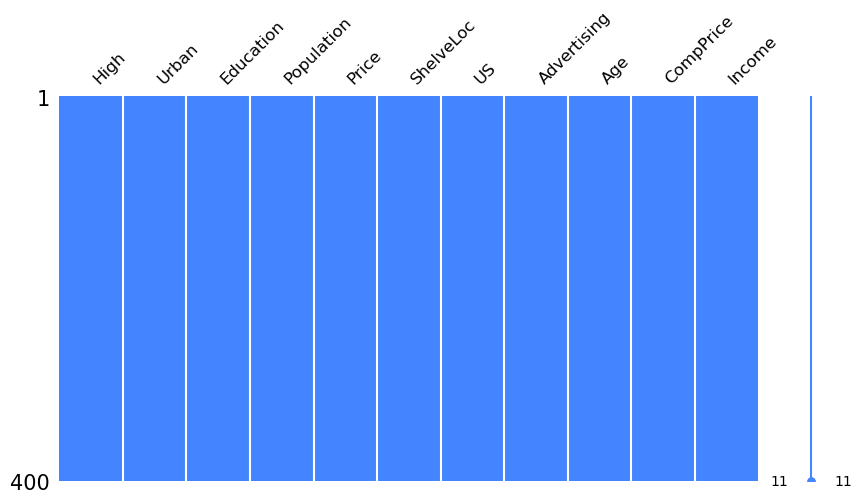

In [11]:
missingno.matrix(df_binpi, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


In [12]:
predicted = []
real = []
predictors = []
for i in range(missing_values):
    print(df_binpi.loc[row_list[i], var_list[i]], df_complete.loc[row_list[i], var_list[i]])
    predicted.append(df_binpi.loc[row_list[i], var_list[i]])
    real.append(df_complete.loc[row_list[i], var_list[i]])
    predictors.append(var_list[i])

df_result_binpi = pd.DataFrame(
    {'Predictor':predictors,
     'Real Value': real,
     'Predicted Value BINPI': predicted
    })

Yes Yes
Medium Bad
Medium Bad
59.54880607376901 80
122.53320005797946 121
69.4853289986987 120
0.354699209984009 0
Yes Yes
Yes Yes
120.3672497509112 124
434.41658143717257 341
52.40177667926074 73
59.54880607376901 69
66.6782799298239 114
59.38247414892159 42
10.048098032168095 16
120.3672497509112 107
13.61073614399331 15
50.90116355847595 37
69.4853289986987 84
111.99753627814259 131
50.90116355847595 76
120.3672497509112 98
253.56482321948045 477
9.465522405770338 0
65.06270425362803 106
120.3672497509112 97
103.1626616076507 69
0.354699209984009 0
128.90020483167098 138
250.73704061087432 125
107.59299670465246 127
Yes Yes
253.56482321948045 202
Yes No
9.465522405770338 12
65.23509053659583 105
58.048192952984216 43
59.54880607376901 54
10.380886912503808 10
0.354699209984009 0
119.25099874863109 116
Yes Yes
13.692913274269078 11
13.692913274269078 13
Medium Medium
Medium Medium
69.4853289986987 81
128.90020483167098 122
Yes Yes


In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

df_result_binpi.style.hide_index()

Predictor,Real Value,Predicted Value BINPI
US,Yes,Yes
ShelveLoc,Bad,Medium
ShelveLoc,Bad,Medium
Age,80,59.548806
Price,121,122.533200
Income,120,69.485329
Advertising,0,0.354699
Urban,Yes,Yes
US,Yes,Yes
CompPrice,124,120.367250


Sklearn Comparison

Sklearn uses 50 estimators though, but for time reasons this will be compared with 7 

resetting df2, as it is what is returned from the impuattion 

Include imputation_process_sklearn function from before (datamining)

In [14]:
from cart import first_nan
from cart import checkNaN
from cart import matches_dict

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

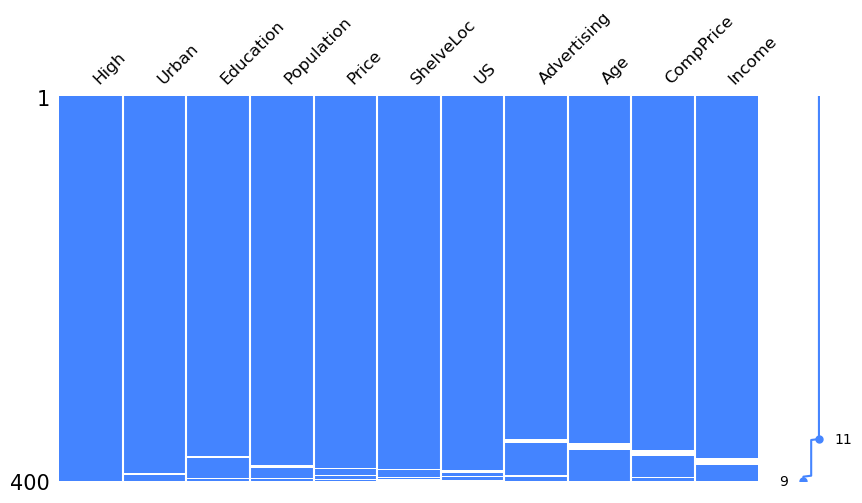

In [15]:
id_matrix = id_matrix_creator(df)

df2, column_vect = lexographical_matrix(df, id_matrix)

missingno.matrix(df2, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

In [16]:
df2.isna().sum().sum()


50

In [17]:
df2.head()

,High,Urban,Education,Population,Price,ShelveLoc,US,Advertising,Age,CompPrice,Income
0,Yes,Yes,17.0,276.0,120.0,Bad,Yes,11.0,42.0,138.0,73.0
1,Yes,Yes,10.0,260.0,83.0,Good,Yes,16.0,65.0,111.0,48.0
2,Yes,Yes,12.0,269.0,80.0,Medium,Yes,10.0,59.0,113.0,35.0
3,No,Yes,14.0,466.0,97.0,Medium,Yes,4.0,55.0,117.0,100.0
4,No,Yes,13.0,340.0,128.0,Bad,No,3.0,38.0,141.0,64.0


In [18]:
df2.replace("Yes", 1, inplace = True)
df2.replace("No", 0, inplace = True)
df2.replace("Good", 3, inplace = True)
df2.replace("Medium", 2, inplace = True)
df2.replace("Bad", 1, inplace = True)

In [19]:
def imputation_process_sklearn(df2, feature_var, row_no, pos, num_var, bin_var, class_var, old_model_fit = "", old_model="",  previous_var= ""):
  '''Creates an adaboost ensemble based on 3 types of adaboost functionality (depending on variable type) to be used for prediction
  on first missing value, which is then imputed'''
  
  #print(df2.shape)
  complete_df = df2.iloc[0:row_no].copy() 
  complete_df.reset_index(drop = True, inplace = True)  
    
  #print(complete_df.shape, row_no, complete_df.isna().sum().sum())             

  y = complete_df[feature_var]
  complete_df.drop(feature_var, axis = 1, inplace = True)
  X = complete_df
  prediction_feat = df2.iloc[row_no].copy()
  prediction_feat.drop(feature_var, inplace = True)
  
  #print(y.isna().sum())

  #As a temporary fix for multiple missing values, will use mean imputation for a secondary, tertiary etc missing value temporarily 
  for series_name in X.columns:                                  
        if checkNaN(prediction_feat[series_name]):
            if series_name in cat_var:
                prediction_feat[series_name] = Counter(X[series_name][X[series_name].notna()]).most_common(1)[0][0] 
                #print("prediction_feat", series_name ,Counter(X[series_name][X[series_name].notna()]).most_common(1)[0][0])
            else:
                prediction_feat[series_name] = round(mean(X[series_name][X[series_name].notna()]),0)

  imp_time_start = time.time()
  if feature_var in num_var:
    if feature_var != previous_var:
      model = AdaBoostRegressor(random_state = 42)
      model_fit = model.fit(X.values,y.values)
      yhat = model.predict([prediction_feat])
    else:
      yhat = old_model_fit.predict([prediction_feat])
      model, model_fit = old_model, old_model_fit
  
  elif feature_var in bin_var:
    if feature_var != previous_var:
      model = AdaBoostClassifier(random_state = 42)
      model_fit = model.fit(X.values,y.values)
      yhat = model.predict([prediction_feat])
    else:
      yhat = old_model_fit.predict([prediction_feat])
      model, model_fit = old_model, old_model_fit

  elif feature_var in class_var:
    if feature_var != previous_var:
      model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3),  random_state = 42)
      model_fit = model.fit(X.values,y.values)
      yhat = model.predict([prediction_feat]) 
    else:
      yhat = old_model_fit.predict([prediction_feat])
      model, model_fit = old_model, old_model_fit
  else: 
    print("Error, found variable missing from variable lists")

  df2.iloc[row_no, pos-1] = yhat[0]
  previous_var = feature_var

  return model_fit, model, previous_var


In [20]:
dict_match = matches_dict(column_vect)

last_nan = 0
iteration = 0 
while df2.isna().any().any() > 0: #iterates until there arent any na values
  
  start = time.time()
  iteration +=1
  
  row_no, column_vect, last_nan, skip_point = first_nan(df2, column_vect, last_nan)        #finds first nan
  feature_var, pos = feature_variable(df2, row_no)
  
  if skip_point[0]:   #the skip point allows the algorithm to reuse the last generated ensemble
  
    #feature_var, pos = feature_variable(df2, row_no)

    for i in range(dict_match[" ".join(skip_point[3])]):     
  
      if iteration >1:
        model_fit_1, model_1, previous_var_1 = imputation_process_sklearn(df2, feature_var, row_no, pos,  num_var, bin_var, 
                                                                  class_var, old_model_fit, old_model,  previous_var)
      else:
        model_fit_1, model_1, previous_var_1 = imputation_process_sklearn(df2, feature_var, row_no, pos,  num_var, bin_var, class_var)

      old_model_fit, old_model,  previous_var = model_fit_1, model_1, previous_var_1
      
      print("time", time.time() - start)
      iteration +=1
      
      if i >0:
        column_vect[row_no] = (skip_point[1]-1, skip_point[2], skip_point[3]) 
        # for multi missing points, to stop it from going back in
      print(column_vect[row_no])
      row_no+=1
    continue

  feature_var, pos = feature_variable(df2, row_no)
  print("Iteration:",iteration,"/ Row Number of Observation for Prediction:",row_no, "/ Missing Variable:",feature_var)
  
  if iteration >1:
    model_fit_1, model_1, previous_var_1 = imputation_process_sklearn(df2, feature_var, row_no, pos,  num_var, bin_var, class_var, 
                                                              old_model_fit, old_model,  previous_var)
  else:
    model_fit_1, model_1, previous_var_1 = imputation_process_sklearn(df2, feature_var, row_no, pos,  num_var, bin_var, class_var)
  old_model_fit, old_model,  previous_var = model_fit_1, model_1, previous_var_1
  print("time", time.time() - start)

Iteration: 1 / Row Number of Observation for Prediction: 356 / Missing Variable: Advertising
time 0.04179859161376953
Iteration: 2 / Row Number of Observation for Prediction: 357 / Missing Variable: Advertising
time 0.006628751754760742
Iteration: 3 / Row Number of Observation for Prediction: 358 / Missing Variable: Advertising
time 0.006617546081542969
Iteration: 4 / Row Number of Observation for Prediction: 359 / Missing Variable: Advertising
time 0.004625558853149414
Iteration: 5 / Row Number of Observation for Prediction: 360 / Missing Variable: Advertising
time 0.0050830841064453125
Iteration: 6 / Row Number of Observation for Prediction: 361 / Missing Variable: Age
time 0.1075742244720459
Iteration: 7 / Row Number of Observation for Prediction: 362 / Missing Variable: Age
time 0.0031948089599609375
Iteration: 8 / Row Number of Observation for Prediction: 363 / Missing Variable: Age
time 0.004548549652099609
Iteration: 9 / Row Number of Observation for Prediction: 364 / Missing Va

In [21]:
predicted = []
real = []
predictors = []
for i in range(missing_values):
    #print(df2.loc[row_list[i], var_list[i]], df_complete.loc[row_list[i], var_list[i]])
    predicted.append(df2.loc[row_list[i], var_list[i]])
    #real.append(df_complete.loc[row_list[i], var_list[i]])
    #predictors.append(var_list[i])

df_result = pd.DataFrame(
    {'Predicted Value Sklearn': predicted})

In [ ]:
df_result_binpi["Predicted Value Sklearn"] = predicted

In [23]:
practiceboy = df_result_binpi.copy()

In [26]:
for i in range(missing_values):
    if practiceboy.loc[i, "Predictor"] in ["US", "Urban"]:
        if practiceboy.loc[i, "Predicted Value Sklearn"] == 0: 
            practiceboy.loc[i, "Predicted Value Sklearn"] = "No"
        if practiceboy.loc[i, "Predicted Value Sklearn"] == 1: 
            practiceboy.loc[i, "Predicted Value Sklearn"] = "Yes"
    elif practiceboy.loc[i, "Predictor"] in ["ShelveLoc"]:
        if practiceboy.loc[i, "Predicted Value Sklearn"] == 1: 
            practiceboy.loc[i, "Predicted Value Sklearn"] = "Bad"
        if practiceboy.loc[i, "Predicted Value Sklearn"] == 2: 
            practiceboy.loc[i, "Predicted Value Sklearn"] = "Medium"
        if practiceboy.loc[i, "Predicted Value Sklearn"] == 3: 
            practiceboy.loc[i, "Predicted Value Sklearn"] =  "Good"


In [32]:
practiceboy.style.hide_index()

Predictor,Real Value,Predicted Value BINPI,Predicted Value Sklearn
US,Yes,Yes,No
ShelveLoc,Bad,Medium,Medium
ShelveLoc,Bad,Medium,Bad
Age,80,59.548806,57.837838
Price,121,122.533200,107.533113
Income,120,69.485329,67.032374
Advertising,0,0.354699,0.394737
Urban,Yes,Yes,Yes
US,Yes,Yes,Yes
CompPrice,124,120.367250,124.169231


In [29]:
#cat_var = ["ShelveLoc", "Urban", "US"]

missclass_binpi = 0 
missclass_sklearn = 0 
total = 0
for i in range(missing_values):
    if practiceboy.loc[i, "Predictor"] in cat_var:
        total +=1
        if practiceboy.loc[i, "Real Value"] != practiceboy.loc[i, "Predicted Value BINPI"]:
            missclass_binpi += 1
        if practiceboy.loc[i, "Real Value"] != practiceboy.loc[i, "Predicted Value Sklearn"]:
            missclass_sklearn += 1
missclass_binpi/total*100,"%", missclass_sklearn/total*100, "%"

(27.27272727272727, '%', 27.27272727272727, '%')

In [31]:
#num_var

mse_binpi = 0
mse_sklearn = 0 
total = 0 

for i in range(missing_values):
    if practiceboy.loc[i, "Predictor"] in num_var:
        total +=1
        mse_binpi += (practiceboy.loc[i, "Real Value"] - practiceboy.loc[i, "Predicted Value BINPI"])**2
        #if practiceboy.loc[i, "Real Value"] != practiceboy.loc[i, "Predicted Value Sklearn"]:
        mse_sklearn += (practiceboy.loc[i, "Real Value"] - practiceboy.loc[i, "Predicted Value Sklearn"])**2
mse_binpi/total, mse_sklearn/total

(2339.8089567761863, 1774.3139597409684)